In [ ]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
text = pd.read_csv('/content/drive/MyDrive/2021_medium_data.csv')

In [ ]:
text.head()

,id,url,title,subtitle,first_para,image,claps,responses,reading_time,publication,date
0,2021_01_01_0,https://towardsdatascience.com/the-ultimate-gu...,The Ultimate Guide to Acing Coding Interviews ...,Understanding 4 types of coding interview ques...,Written by,2021_01_01_0.jpg,0.0,0.0,12.0,Towards Data Science,2021/01/01
1,2021_01_01_1,https://towardsdatascience.com/7-most-recommen...,7 Most Recommended Skills to Learn in 2021 to ...,Recommended by some of the largest data leader...,Happy New Year!,2021_01_01_1.png,1000.0,10.0,6.0,Towards Data Science,2021/01/01
2,2021_01_01_2,https://towardsdatascience.com/optimal-thresho...,Optimal Threshold for Imbalanced Classification,How to choose the optimal threshold using a RO...,Classification is one of the supervised learni...,2021_01_01_2.jpg,0.0,0.0,7.0,Towards Data Science,2021/01/01
3,2021_01_01_3,https://towardsdatascience.com/implementing-vi...,Implementing Vision Transformer (ViT) in PyTorch,"Hi guys, happy new year! Today we are going to...","Hi guys, happy new year! Today we are going to...",2021_01_01_3.png,393.0,6.0,6.0,Towards Data Science,2021/01/01
4,2021_01_01_4,https://towardsdatascience.com/customer-segmen...,Customer Segmentation in Online Retail,A detailed step-by-step explanation on perform...,"In this article, I am going to write about how...",2021_01_01_4.jpg,229.0,1.0,19.0,Towards Data Science,2021/01/01


In [ ]:
text = text.sample(5000)

In [ ]:
text.shape[0]

5000

In [ ]:
text['title']

11210        Emotional Intelligence! How Can We Master It?
6218     Is Take-Two Interactive Making Money? — Market...
5456                                   Sentiment Analysis:
31847    Is the Speculative Fiction Market Getting Harder?
17702    How I Broke Out of the 9–5 Grind by Building a...
                               ...                        
3912     The Cluelessness of One-Percenters Makes Them ...
31917     Exploration of Deep Learning pipelines made easy
12241                Weird Trick for Learning Data Science
23314    The 7 Best Ways to Learn Python Depending On Y...
21790    MasterCard’s Astonishing Growth — Market Mad H...
Name: title, Length: 5000, dtype: object

In [ ]:
for index,content in text.iterrows():
    text.at[index, 'title'] = re.sub('[^a-zA-Z]', ' ', str(content['title']).lower())

In [ ]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(text['title'])
total_words = len(tokenizer.word_index)+1


print(f'Total words in our Corpus {total_words}')

Total words in our Corpus 6930


In [ ]:
tokenizer.word_index

{'<oov>': 1,
 'to': 2,
 'the': 3,
 'a': 4,
 'in': 5,
 'and': 6,
 'how': 7,
 'of': 8,
 'strong': 9,
 'for': 10,
 'your': 11,
 'you': 12,
 'data': 13,
 'with': 14,
 'is': 15,
 'class': 16,
 'ba': 17,
 's': 18,
 'python': 19,
 'i': 20,
 'learning': 21,
 'from': 22,
 'on': 23,
 'why': 24,
 'what': 25,
 'using': 26,
 'it': 27,
 'an': 28,
 'can': 29,
 'writing': 30,
 'science': 31,
 't': 32,
 'that': 33,
 'machine': 34,
 'my': 35,
 'are': 36,
 'should': 37,
 'about': 38,
 'be': 39,
 'part': 40,
 'do': 41,
 'use': 42,
 'not': 43,
 'ai': 44,
 'time': 45,
 'design': 46,
 'make': 47,
 'by': 48,
 'as': 49,
 'know': 50,
 'new': 51,
 'get': 52,
 'guide': 53,
 'market': 54,
 'need': 55,
 'this': 56,
 'business': 57,
 'will': 58,
 'more': 59,
 'money': 60,
 'when': 61,
 'analysis': 62,
 'best': 63,
 'marketing': 64,
 'don': 65,
 'model': 66,
 'one': 67,
 'we': 68,
 'build': 69,
 'top': 70,
 'tips': 71,
 'learn': 72,
 'ways': 73,
 'deep': 74,
 'at': 75,
 'have': 76,
 'up': 77,
 'better': 78,
 'way': 7

In [ ]:
input_sequences =[]

for line in text['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  38609


In [ ]:
max_length = max([len(i) for i in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen = max_length,padding='pre'))
input_sequences[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 1087,  209],
      dtype=int32)

In [ ]:
xs,labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
xs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 1087],
      dtype=int32)

In [ ]:
model = Sequential([
    Embedding(total_words,100,input_length=max_length-1),
    Bidirectional(LSTM(100)),# First Bidirectional LSTM layer
    Dense(total_words,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           693000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 6930)              1392930   
                                                                 
Total params: 2,246,730
Trainable params: 2,246,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=4)

In [ ]:
history = model.fit(xs,ys,callbacks=[callback],epochs=50)

Epoch 1/50
1207/1207 [==============================] - 150s 121ms/step - loss: 7.1548 - accuracy: 0.0555
Epoch 2/50
1207/1207 [==============================] - 143s 118ms/step - loss: 6.4277 - accuracy: 0.1002
Epoch 3/50
1207/1207 [==============================] - 141s 117ms/step - loss: 5.9584 - accuracy: 0.1316
Epoch 4/50
1207/1207 [==============================] - 139s 115ms/step - loss: 5.5600 - accuracy: 0.1521
Epoch 5/50
1207/1207 [==============================] - 143s 118ms/step - loss: 5.1942 - accuracy: 0.1743
Epoch 6/50
1207/1207 [==============================] - 140s 116ms/step - loss: 4.8547 - accuracy: 0.1968
Epoch 7/50
1207/1207 [==============================] - 138s 115ms/step - loss: 4.5310 - accuracy: 0.2205
Epoch 8/50
1207/1207 [==============================] - 139s 115ms/step - loss: 4.2178 - accuracy: 0.2505
Epoch 9/50
1207/1207 [==============================] - 139s 115ms/step - loss: 3.9156 - accuracy: 0.2841
Epoch 10/50
1207/1207 [=======================

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title(string)
    plt.grid()
    plt.show()

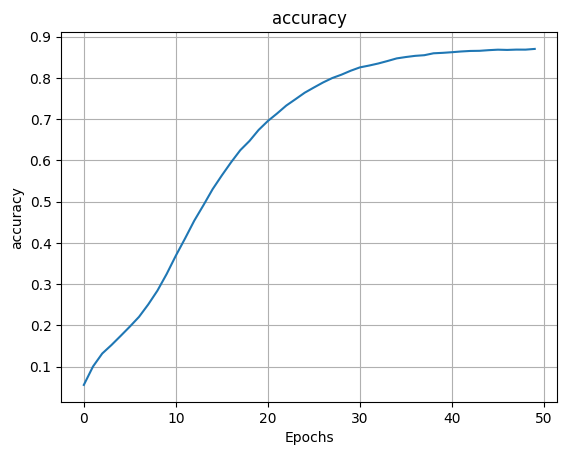

In [ ]:
plot_graphs(history, 'accuracy')

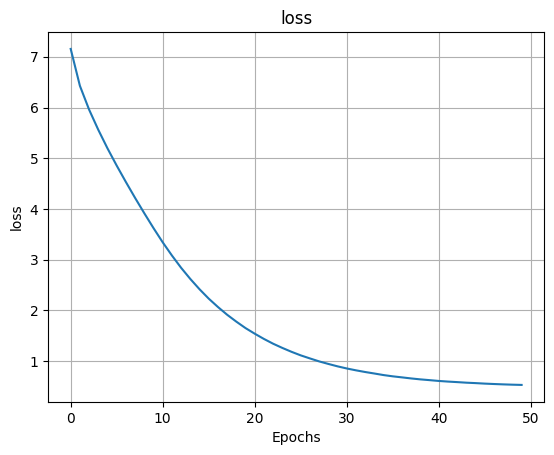

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
text_input = "how data"

predict_next_word = 5

for i in range(predict_next_word):
  token_list = tokenizer.texts_to_sequences([text_input])[0]
  token_list = pad_sequences([token_list],maxlen=max_length-1,padding='pre')
  predicted = np.argmax(model.predict(token_list,verbose=0),axis=-1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
      if index == predicted:
          output_word = word
          break
  text_input += " " + output_word
print(text_input)


how data scientists can troubleshoot etl issues


In [ ]:
model.save('next word prediction V1.keras')